In [1]:
#Lets import our dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import joblib
from tkinter import *

In [2]:
#Lets import the data into the dataframe

data = pd.read_csv(r"C:\Users\Accounts01\Desktop\Folders 1\Data set for projects\Mall_Customers.csv")



In [3]:
#Display Top 5 rows

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Diplay last 5 rows

data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#The shape of our Data set

print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 200
Number of columns 5


In [6]:
#More information about our Data set

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Statistical information about the Dataset

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#Lets check for null Values

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#KMeans Clustering

data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
k_means = KMeans()
k_means.fit_predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 7, 1, 7, 1,
       0, 1, 7, 1, 7, 1, 7, 1, 7, 1, 0, 1, 7, 1, 0, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 1, 7, 1, 0, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6])

In [12]:
#Lets find the optimal number clusters by using Elbow method

wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\Accounts01\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 31583.261826590515,
 25029.25342493588,
 21850.16528258562,
 19634.554629349972]

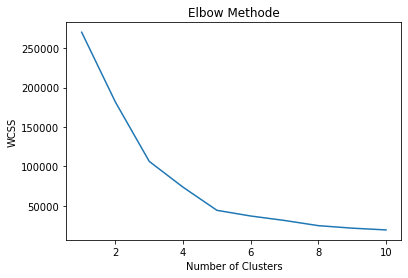

In [14]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Methode')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

In [15]:
#Model Training again

k_means = KMeans(n_clusters = 5, random_state = 42)

In [16]:
y = k_means.fit_predict(X)

In [17]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

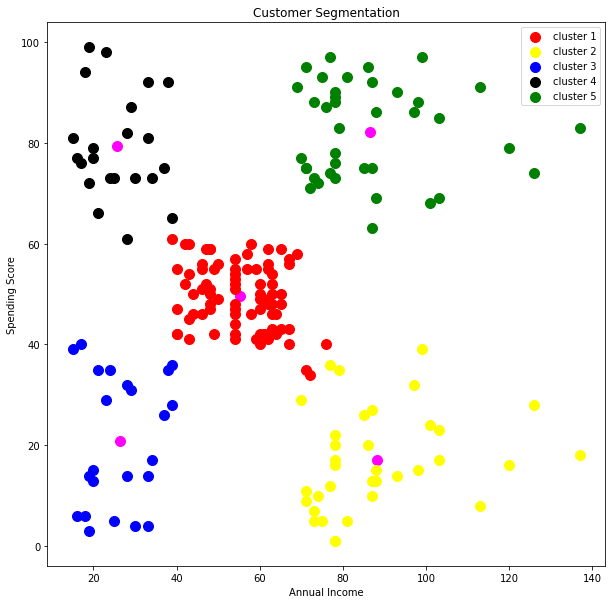

In [18]:
plt.figure(figsize = (10, 10))
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 100, c = 'magenta')
plt.scatter(X.iloc[y == 0, 0], X.iloc[y == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X.iloc[y == 1, 0], X.iloc[y == 1, 1], s = 100, c = 'yellow', label = 'cluster 2')
plt.scatter(X.iloc[y == 2, 0], X.iloc[y == 2, 1], s = 100, c = 'blue', label = 'cluster 3')
plt.scatter(X.iloc[y == 3, 0], X.iloc[y == 3, 1], s = 100, c = 'black', label = 'cluster 4')
plt.scatter(X.iloc[y == 4, 0], X.iloc[y == 4, 1], s = 100, c = 'green', label = 'cluster 5')
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [19]:
k_means.predict([[15,39]])

array([2])

In [20]:
#Save the model

joblib.dump(k_means, "Customer_Segmentation")


['Customer_Segmentation']

In [21]:
model = joblib.load('Customer_Segmentation')

In [22]:
model.predict([[15,36]])

array([2])

In [23]:
#GUI

def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    
    model = joblib.load('Customer_Segmentation')
    results = model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", results[0])
    
    if results[0] == 0:
        Label(master, text = 'Customers with medium annual income and medium annual spend').grid()
    elif results[0] == 1:
        Label(master, text = 'Customers with high annual income but low annual spend').grid()
    elif results[0] == 2:
        Label(master, text = 'Customers with low annual income and low annual spend').grid()
    elif results[0] == 3:
        Label(master, text = 'Customers with low annual income and high annual spend').grid()
    elif results[0] == 4:
        Label(master, text = 'Customers with high annual income and high annual spend').grid()
        
    

In [24]:
master = Tk()
master.title("Customer Segmentation Using Machine Learning")

''

In [26]:
label = Label(master, text = "Customer Segmentation Using Machine Learning", bg="black", fg="white"). grid(row=0, columnspan = 2)
Label(master, text = "Annual Income").grid(row=1)
Label(master, text = "Annual Spending Score").grid(row=2)


In [27]:
e1 = Entry(master)
e2 = Entry(master)

In [28]:
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

In [ ]:
Button(master, text = "Predict", command = show_entry_fields).grid()
mainloop()

This Customer belongs to cluster no:  2
This Customer belongs to cluster no:  3
